# TCS stock price prediction


In [2]:
# pandas and numpy are used for data manipulation 
import numpy as np
import pandas as pd
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# yahoo_finance is used to fetch data
data=pd.read_csv("TCS.BO.CSV",sep=",",parse_dates=['Date'],index_col='Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-05,1048.0,1051.000000,1015.919983,1021.030029,871.226990,150200.0
2013-11-06,1031.0,1050.000000,1030.000000,1045.880005,892.430847,183622.0
2013-11-07,1045.5,1074.000000,1042.849976,1060.569946,904.965637,281770.0
2013-11-08,1061.0,1065.000000,1038.000000,1046.400024,892.874634,172414.0
2013-11-11,1045.0,1069.949951,1030.530029,1048.969971,895.067627,149600.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2013-11-05 to 2018-11-02
Data columns (total 6 columns):
Open         1231 non-null float64
High         1231 non-null float64
Low          1231 non-null float64
Close        1231 non-null float64
Adj Close    1231 non-null float64
Volume       1231 non-null float64
dtypes: float64(6)
memory usage: 67.4 KB


In [4]:
data.index

DatetimeIndex(['2013-11-05', '2013-11-06', '2013-11-07', '2013-11-08',
               '2013-11-11', '2013-11-12', '2013-11-13', '2013-11-14',
               '2013-11-18', '2013-11-19',
               ...
               '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25',
               '2018-10-26', '2018-10-29', '2018-10-30', '2018-10-31',
               '2018-11-01', '2018-11-02'],
              dtype='datetime64[ns]', name='Date', length=1233, freq=None)

In [5]:
data.loc[data['High']==1035]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-12,1024.400024,1035.0,1012.0,1013.419983,864.733521,122688.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168D43B5550>,
      dtype=object)

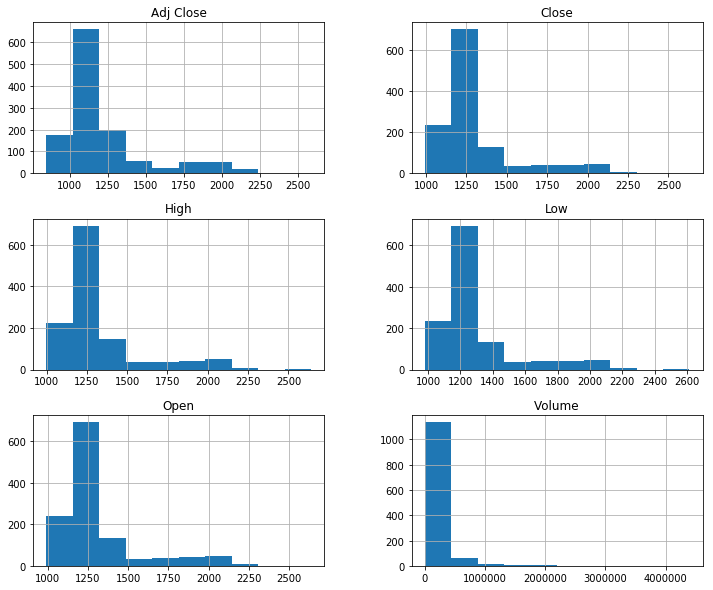

In [6]:
data.hist(figsize=(12,10))

In [7]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998595,0.998682,0.997157,0.984151,0.039656
High,0.998595,1.000000,0.998534,0.998968,0.985905,0.049232
Low,0.998682,0.998534,1.000000,0.998878,0.986194,0.033475
Close,0.997157,0.998968,0.998878,1.000000,0.987108,0.040528
Adj Close,0.984151,0.985905,0.986194,0.987108,1.000000,0.046391
Volume,0.039656,0.049232,0.033475,0.040528,0.046391,1.000000


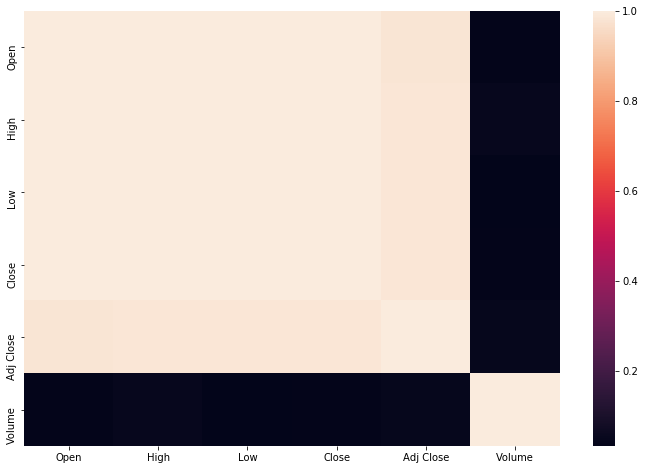

In [12]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), fmt="f",ax=ax)

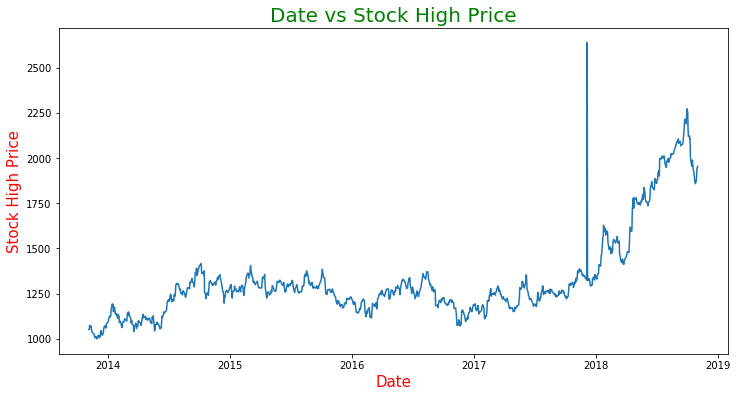

In [13]:
plt.figure(figsize=(12,6))
plt.plot(data['High'])
plt.title("Date vs Stock High Price",fontsize=20,color='g')
plt.xlabel("Date",fontsize=15,color='r')
plt.ylabel("Stock High Price",fontsize=15,color='r')
plt.show()

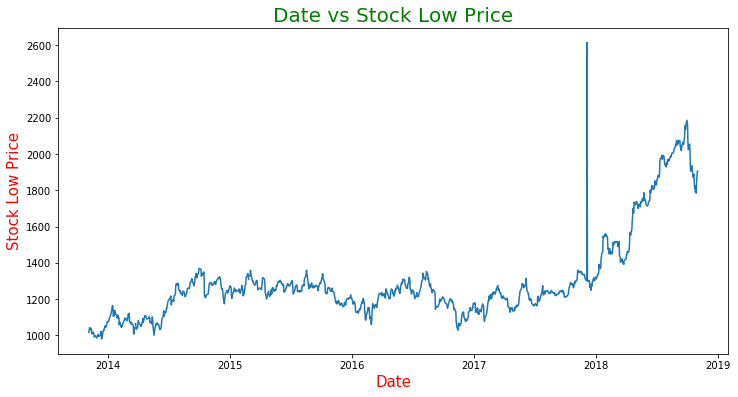

In [19]:
plt.figure(figsize=(12,6))
plt.plot(data['Low'])
plt.title("Date vs Stock Low Price",fontsize=20,color='g')
plt.xlabel("Date",fontsize=15,color='r')
plt.ylabel("Stock Low Price",fontsize=15,color='r')
plt.show()

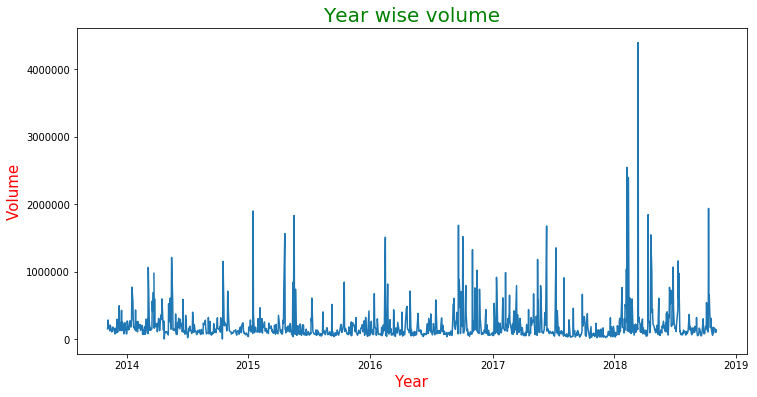

In [14]:
plt.figure(figsize=(12,6))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(data['Volume'])
plt.title("Year wise volume",fontsize=20,color='g')
plt.xlabel("Year",fontsize=15,color='r')
plt.ylabel("Volume",fontsize=15,color='r')
plt.show()

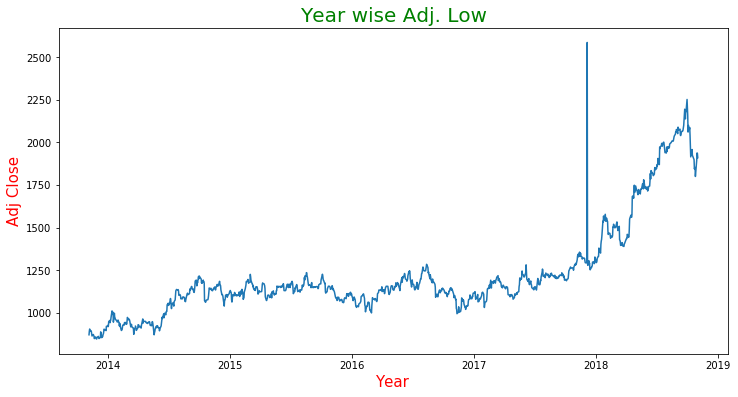

In [15]:
plt.figure(figsize=(12,6))
plt.plot(data['Adj Close'])
plt.title("Year wise Adj. Low",fontsize=20,color='g')
plt.xlabel("Year",fontsize=15,color='r')
plt.ylabel("Adj Close",fontsize=15,color='r')
plt.show()

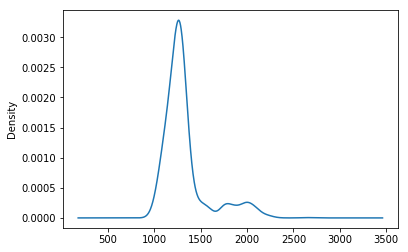

In [16]:
data['High'].plot("kde")

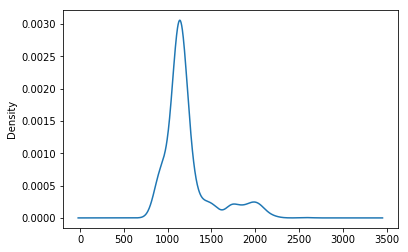

In [17]:
data['Adj Close'].plot("kde")

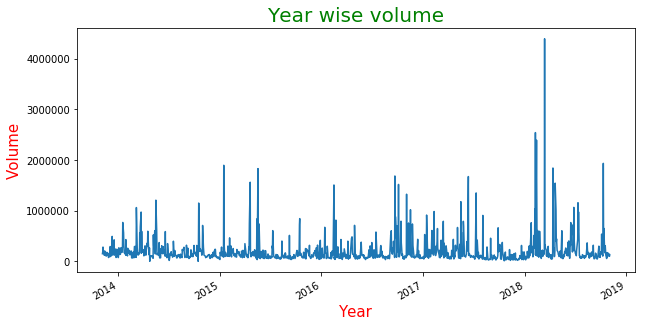

In [5]:
# Only keep Volume columns 
data=data[['Volume']] 
# Drop rows with missing values 
data=data.dropna()
# Plot the closing price of GLD 
data.Volume.plot(figsize=(10,5)) 
plt.title("Year wise volume",fontsize=20,color='g')
plt.xlabel("Year",fontsize=15,color='r')
plt.ylabel("Volume",fontsize=15,color='r')
plt.show()

In [6]:
#Define explanatory variables
data['S_3'] = data['Volume'].shift(1).rolling(window=3).mean() 

data['S_9']= data['Volume'].shift(1).rolling(window=9).mean() 

data= data.dropna() 

X = data[['S_3','S_9']] 

X.head()


,S_3,S_9
Date,,
2013-11-19,166880.666667,173003.555556
2013-11-20,142789.333333,171168.888889
2013-11-21,116968.666667,163300.888889
2013-11-22,141199.333333,151670.888889
2013-11-25,154050.666667,151651.777778


In [7]:
#Define dependent variable
y=data['Volume']
y.head()

Date
2013-11-19    133688.0
2013-11-20    112810.0
2013-11-21    177100.0
2013-11-22    172242.0
2013-11-25    131892.0
Name: Volume, dtype: float64

In [8]:
#Split the data into train and test dataset
t=.8 

t = int(t*len(data)) 

# Train dataset 

X_train = X[:t] 

y_train = y[:t]  

# Test dataset 

X_test = X[t:] 

y_test = y[t:]

In [11]:
# LinearRegression is a machine learning library for linear regression 

from sklearn.linear_model import LinearRegression 

#Create a linear regression model
# Y = m1 * X1 + m2 * X2 + C

# stock_price = m1 * 3 days moving average + m2 * 15 days moving average + c

In [13]:
linear = LinearRegression().fit(X_train,y_train) 

print("TCS stock Price =", round(linear.coef_[0],2), 

"* 3 Days Moving Average", round(linear.coef_[1],2),  

"* 9 Days Moving Average +", round(linear.intercept_,2))

TCS stock Price = 0.12 * 3 Days Moving Average 0.3 * 9 Days Moving Average + 105773.67


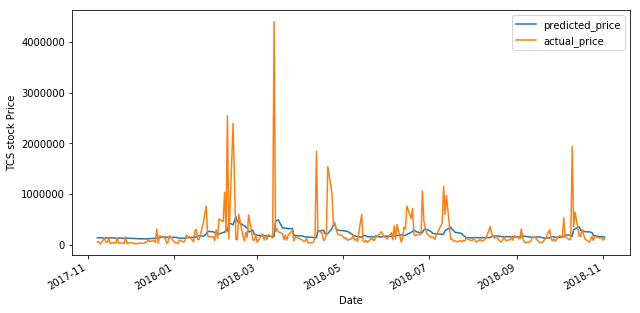

In [14]:
#Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)  

predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  

predicted_price.plot(figsize=(10,5))  

y_test.plot()  

plt.legend(['predicted_price','actual_price'])  

plt.ylabel("TCS stock Price")  

plt.show()

In [15]:
r2_score = linear.score(X[t:],y[t:])*100  

float("{0:.2f}".format(r2_score))

2.35